In [1]:
pip install pandas numpy matplotlib scikit-learn


In [3]:
pip install yfinance


[*********************100%%**********************]  1 of 1 completed


Validation RMSE: 1.5379545371594425
Test RMSE: 1.5884208569532625


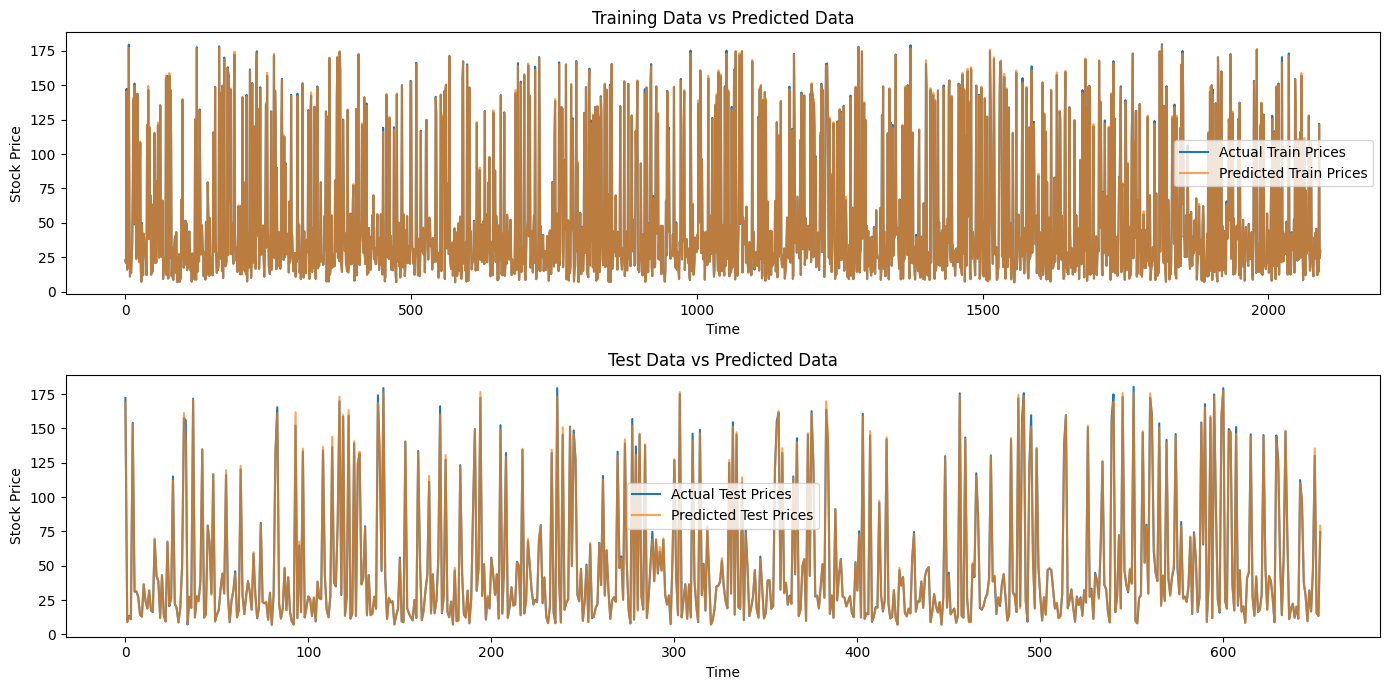

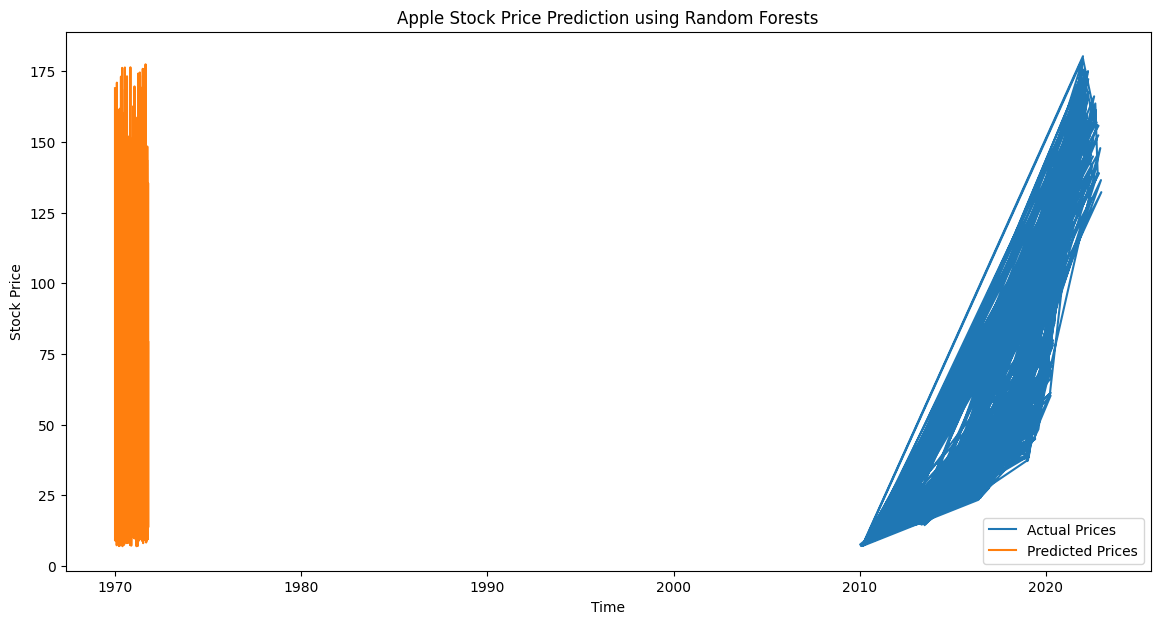

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import yfinance as yf

# Download the dataset from Yahoo Finance
ticker = 'AAPL'
data = yf.download(ticker, start='2010-01-01', end='2023-01-01')

# Preprocess the data
data['Date'] = pd.to_datetime(data.index)
data.set_index('Date', inplace=True)

# Feature engineering: use past closing prices as features
data['Close_shift_1'] = data['Close'].shift(1)
data['Close_shift_2'] = data['Close'].shift(2)
data['Close_shift_3'] = data['Close'].shift(3)

# Drop NaN values
data = data.dropna()

# Define features and target
X = data[['Close_shift_1', 'Close_shift_2', 'Close_shift_3']]
y = data['Close']

# Split the data into training (80%) and testing (20%) sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training set into training (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model on the validation set
val_predictions = model.predict(X_val)
val_mse = mean_squared_error(y_val, val_predictions)
val_rmse = np.sqrt(val_mse)
print(f'Validation RMSE: {val_rmse}')

# Evaluate the model on the test set
test_predictions = model.predict(X_test)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
print(f'Test RMSE: {test_rmse}')

# Plot training graph
plt.figure(figsize=(14, 7))

# Training data
plt.subplot(2, 1, 1)
plt.plot(y_train.values, label='Actual Train Prices')
plt.plot(model.predict(X_train), label='Predicted Train Prices', alpha=0.7)
plt.title('Training Data vs Predicted Data')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()

# Test data
plt.subplot(2, 1, 2)
plt.plot(y_test.values, label='Actual Test Prices')
plt.plot(test_predictions, label='Predicted Test Prices', alpha=0.7)
plt.title('Test Data vs Predicted Data')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()

plt.tight_layout()
plt.show()


# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual Prices')
plt.plot(test_predictions, label='Predicted Prices')
plt.title('Apple Stock Price Prediction using Random Forests')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed


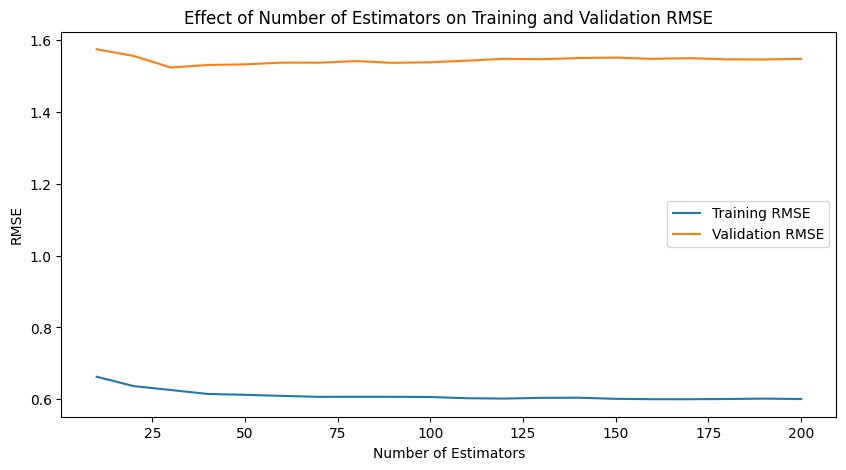

Best Number of Estimators: 30
Test RMSE: 1.5901231992228728


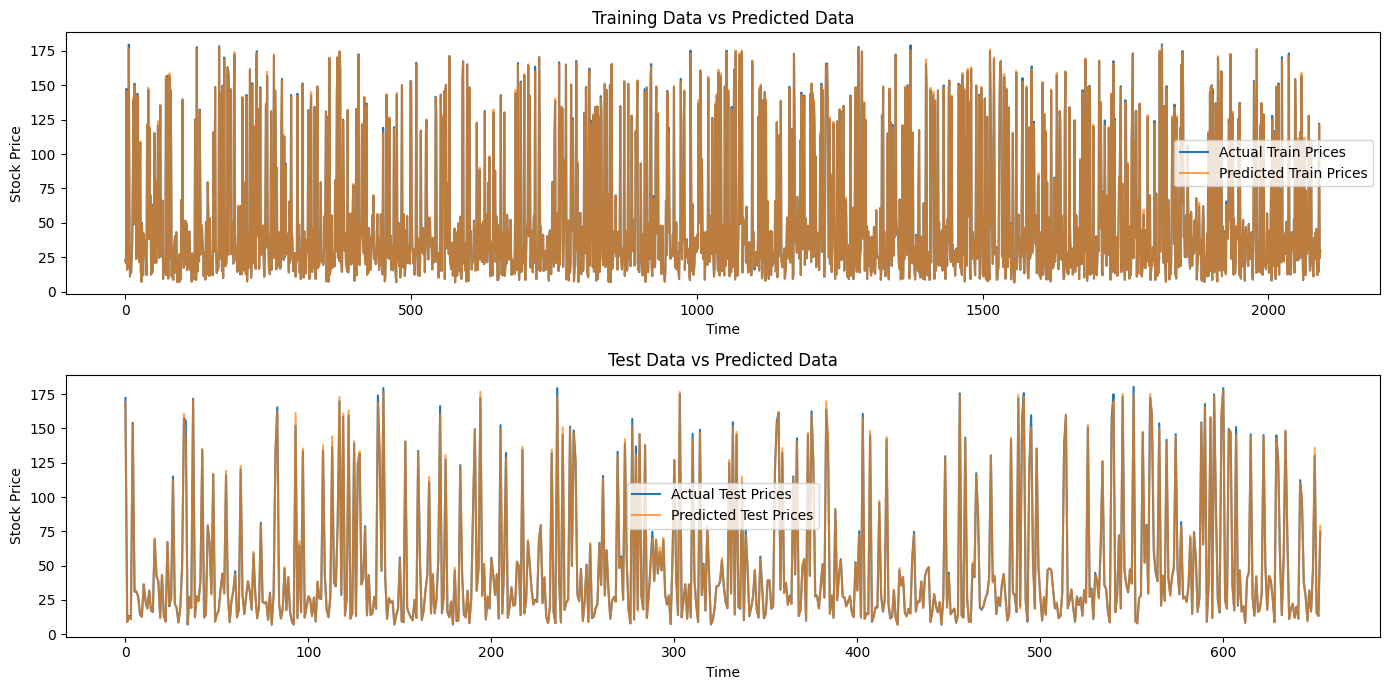

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import yfinance as yf

# Download the dataset from Yahoo Finance
ticker = 'AAPL'
data = yf.download(ticker, start='2010-01-01', end='2023-01-01')

# Preprocess the data
data['Date'] = pd.to_datetime(data.index)
data.set_index('Date', inplace=True)

# Feature engineering: use past closing prices as features
data['Close_shift_1'] = data['Close'].shift(1)
data['Close_shift_2'] = data['Close'].shift(2)
data['Close_shift_3'] = data['Close'].shift(3)

# Drop NaN values
data = data.dropna()

# Define features and target
X = data[['Close_shift_1', 'Close_shift_2', 'Close_shift_3']]
y = data['Close']

# Split the data into training (80%) and testing (20%) sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training set into training (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Initialize lists to store RMSE values for plotting
train_rmse_list = []
val_rmse_list = []
n_estimators_list = list(range(10, 201, 10))

# Train and evaluate the model with different numbers of estimators
for n_estimators in n_estimators_list:
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)

    # Calculate RMSE for training set
    train_predictions = model.predict(X_train)
    train_mse = mean_squared_error(y_train, train_predictions)
    train_rmse = np.sqrt(train_mse)
    train_rmse_list.append(train_rmse)

    # Calculate RMSE for validation set
    val_predictions = model.predict(X_val)
    val_mse = mean_squared_error(y_val, val_predictions)
    val_rmse = np.sqrt(val_mse)
    val_rmse_list.append(val_rmse)

# Plot RMSE values
plt.figure(figsize=(10, 5))
plt.plot(n_estimators_list, train_rmse_list, label='Training RMSE')
plt.plot(n_estimators_list, val_rmse_list, label='Validation RMSE')
plt.xlabel('Number of Estimators')
plt.ylabel('RMSE')
plt.title('Effect of Number of Estimators on Training and Validation RMSE')
plt.legend()
plt.show()

# Train final model with the best number of estimators
best_n_estimators = n_estimators_list[np.argmin(val_rmse_list)]
final_model = RandomForestRegressor(n_estimators=best_n_estimators, random_state=42)
final_model.fit(X_train, y_train)

# Evaluate the model on the test set
test_predictions = final_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
print(f'Best Number of Estimators: {best_n_estimators}')
print(f'Test RMSE: {test_rmse}')

# Plot training and test predictions
plt.figure(figsize=(14, 7))

# Training data
plt.subplot(2, 1, 1)
plt.plot(y_train.values, label='Actual Train Prices')
plt.plot(final_model.predict(X_train), label='Predicted Train Prices', alpha=0.7)
plt.title('Training Data vs Predicted Data')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()

# Test data
plt.subplot(2, 1, 2)
plt.plot(y_test.values, label='Actual Test Prices')
plt.plot(test_predictions, label='Predicted Test Prices', alpha=0.7)
plt.title('Test Data vs Predicted Data')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()

plt.tight_layout()
plt.show()


[*********************100%%**********************]  1 of 1 completed


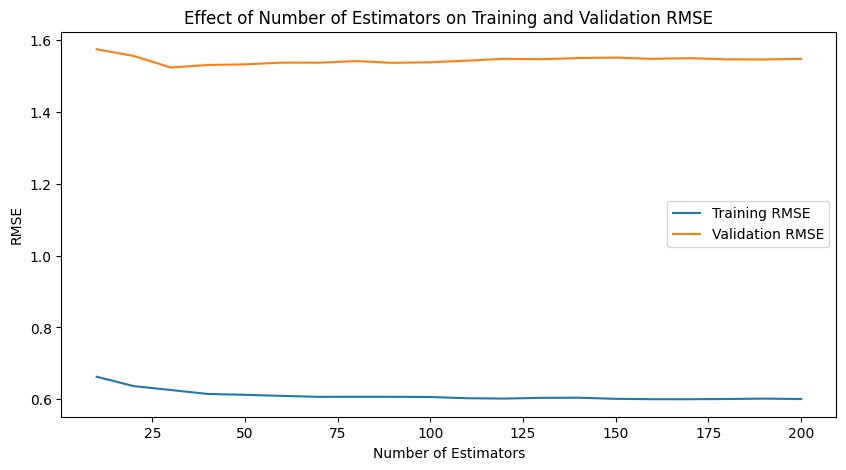

Best Number of Estimators: 30
Test RMSE: 1.5901231992228728


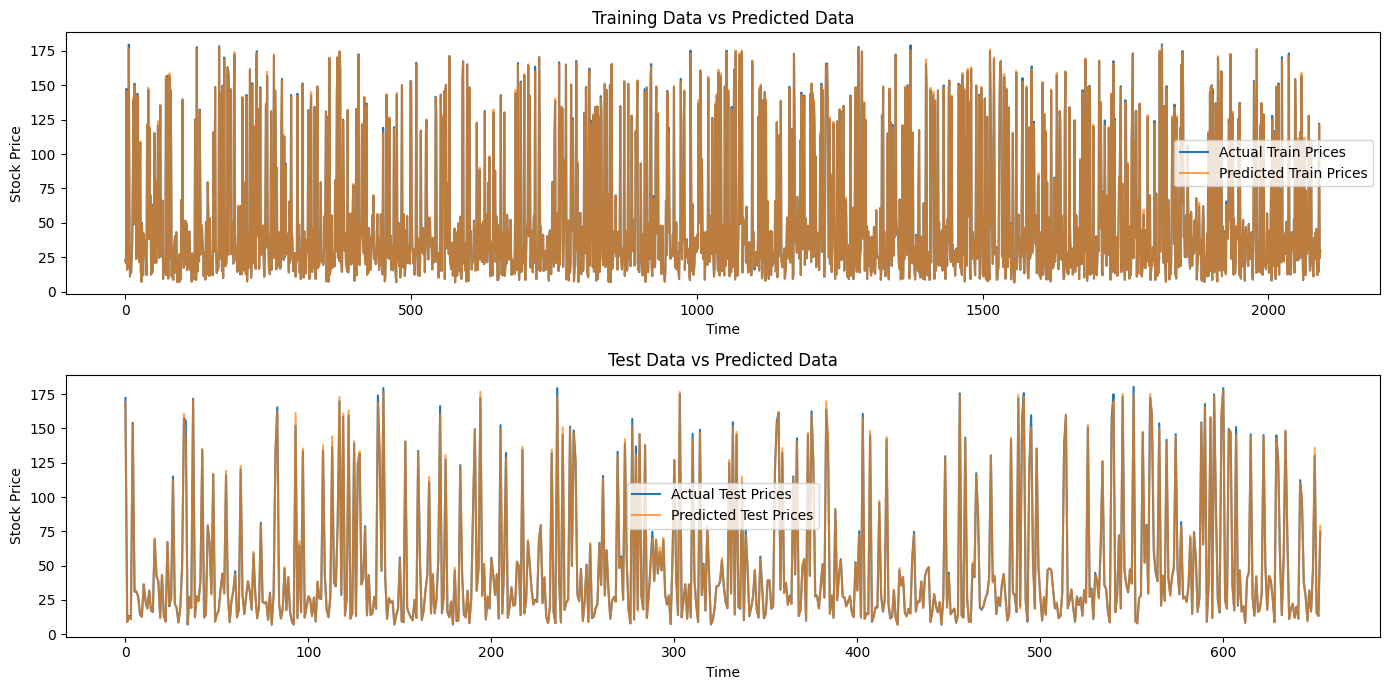

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import yfinance as yf

# Download the dataset from Yahoo Finance
ticker = 'AAPL'
data = yf.download(ticker, start='2010-01-01', end='2023-01-01')

# Preprocess the data
data['Date'] = pd.to_datetime(data.index)
data.set_index('Date', inplace=True)

# Feature engineering: use past closing prices as features
data['Close_shift_1'] = data['Close'].shift(1)
data['Close_shift_2'] = data['Close'].shift(2)
data['Close_shift_3'] = data['Close'].shift(3)

# Drop NaN values
data = data.dropna()

# Define features and target
X = data[['Close_shift_1', 'Close_shift_2', 'Close_shift_3']]
y = data['Close']

# Split the data into training (80%) and testing (20%) sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training set into training (80%) and validation (20%) sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Initialize lists to store RMSE values for plotting
train_rmse_list = []
val_rmse_list = []
n_estimators_list = list(range(10, 201, 10))

# Train and evaluate the model with different numbers of estimators
for n_estimators in n_estimators_list:
    model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)

    # Calculate RMSE for training set
    train_predictions = model.predict(X_train)
    train_mse = mean_squared_error(y_train, train_predictions)
    train_rmse = np.sqrt(train_mse)
    train_rmse_list.append(train_rmse)

    # Calculate RMSE for validation set
    val_predictions = model.predict(X_val)
    val_mse = mean_squared_error(y_val, val_predictions)
    val_rmse = np.sqrt(val_mse)
    val_rmse_list.append(val_rmse)

# Plot RMSE values
plt.figure(figsize=(10, 5))
plt.plot(n_estimators_list, train_rmse_list, label='Training RMSE')
plt.plot(n_estimators_list, val_rmse_list, label='Validation RMSE')
plt.xlabel('Number of Estimators')
plt.ylabel('RMSE')
plt.title('Effect of Number of Estimators on Training and Validation RMSE')
plt.legend()
plt.show()

# Train final model with the best number of estimators
best_n_estimators = n_estimators_list[np.argmin(val_rmse_list)]
final_model = RandomForestRegressor(n_estimators=best_n_estimators, random_state=42)
final_model.fit(X_train, y_train)

# Evaluate the model on the test set
test_predictions = final_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_predictions)
test_rmse = np.sqrt(test_mse)
print(f'Best Number of Estimators: {best_n_estimators}')
print(f'Test RMSE: {test_rmse}')

# Plot training and test predictions
plt.figure(figsize=(14, 7))

# Training data
plt.subplot(2, 1, 1)
plt.plot(y_train.values, label='Actual Train Prices')
plt.plot(final_model.predict(X_train), label='Predicted Train Prices', alpha=0.7)
plt.title('Training Data vs Predicted Data')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()

# Test data
plt.subplot(2, 1, 2)
plt.plot(y_test.values, label='Actual Test Prices')
plt.plot(test_predictions, label='Predicted Test Prices', alpha=0.7)
plt.title('Test Data vs Predicted Data')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()

plt.tight_layout()
plt.show()


Random Forests Apple without dataprocessing actual


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


               Close
Date                
2000-01-03  0.999442
2000-01-04  0.915179
2000-01-05  0.928571
2000-01-06  0.848214
2000-01-07  0.888393
Training data shape: (4781, 60), Training labels shape: (4781, 1)
Testing data shape: (1196, 60), Testing labels shape: (1196, 1)
Random Forest Model - MAE: 72.6107306787561, RMSE: 84.30423402140579


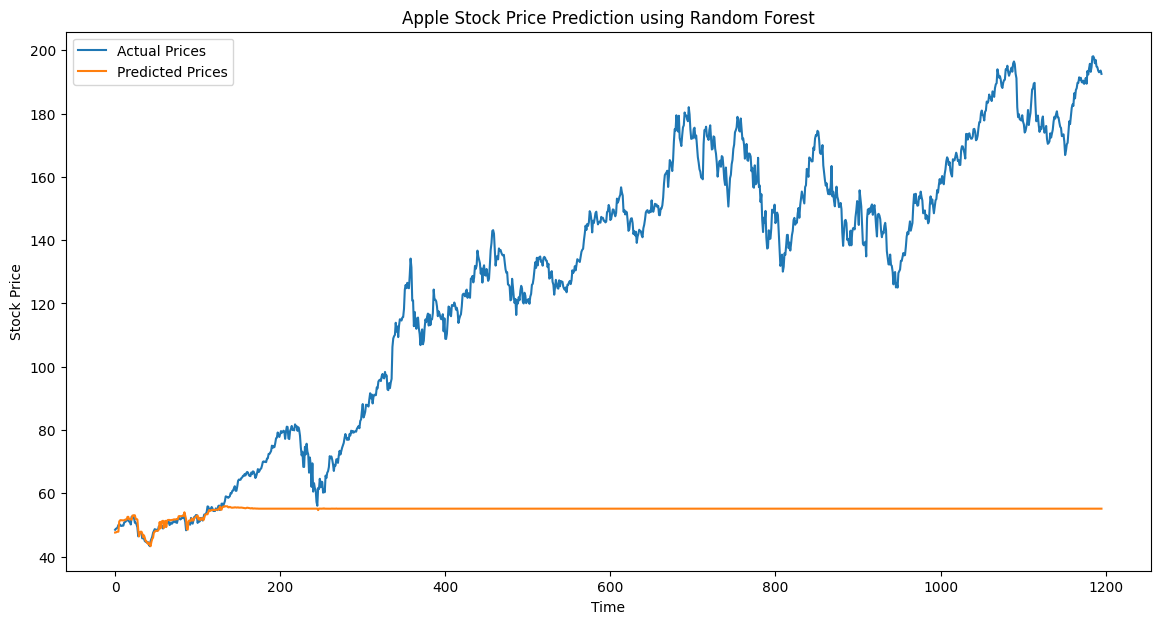

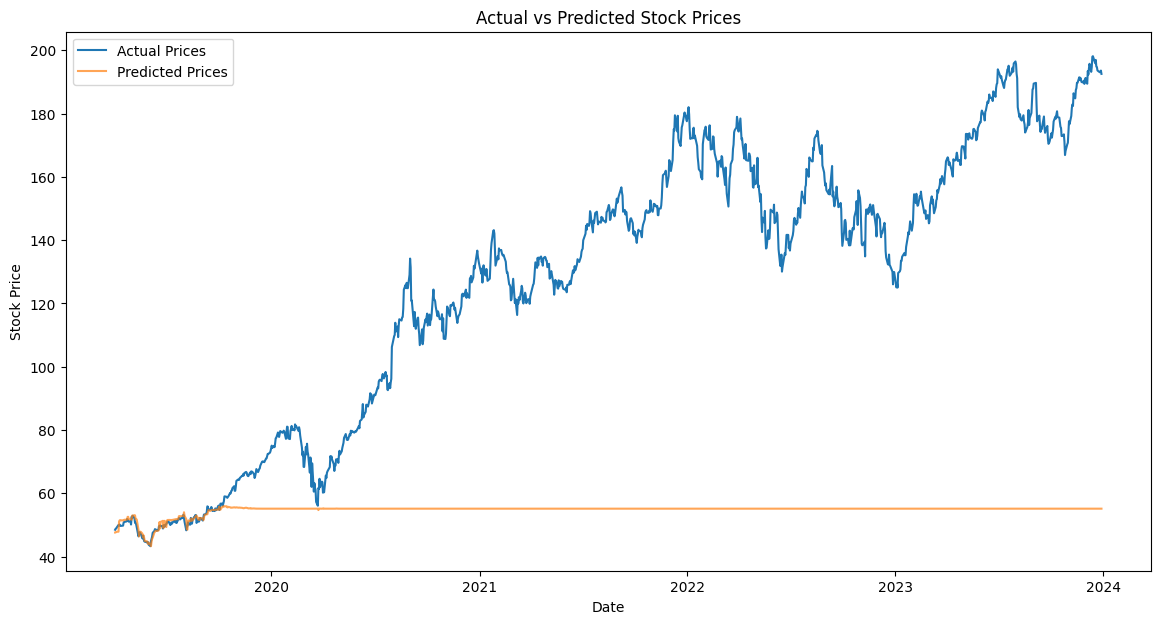

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Fetch the historical stock data for Apple (AAPL)
ticker = 'AAPL'

data_existing = yf.download(ticker, start='2015-01-01', end='2024-01-01')

# Download additional historical data to extend the dataset
data_additional = yf.download(ticker, start='2000-01-01', end='2015-01-01')

# Concatenate the data to create a larger dataset
data = pd.concat([data_additional, data_existing])

# Drop duplicate rows, if any
data = data[~data.index.duplicated(keep='first')]

# Use only the 'Close' prices for simplicity
data = data[['Close']]
print(data.head())

# Feature Engineering: Create sequences of 60 days of data to predict the next day's closing price
sequence_length = 60
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        labels.append(data[i + seq_length])
    return np.array(sequences), np.array(labels)

# Convert the data into sequences
raw_values = data.values
X, y = create_sequences(raw_values, sequence_length)

# Reshape the data to 2D for Random Forest input
X = X.reshape(X.shape[0], -1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the data into training and testing sets (80% train, 20% test)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Check the shape of the datasets
print(f'Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}')
print(f'Testing data shape: {X_test.shape}, Testing labels shape: {y_test.shape}')

# Build the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Random Forest Model - MAE: {mae}, RMSE: {rmse}')

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices')
plt.title('Apple Stock Price Prediction using Random Forest')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Make predictions on the test set
predictions = model.predict(X_test)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(data.index[split+sequence_length:], data['Close'][split+sequence_length:], label='Actual Prices')
plt.plot(data.index[split+sequence_length:], predictions, label='Predicted Prices', alpha=0.7)
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


               Close
Date                
2010-01-04  7.643214
2010-01-05  7.656429
2010-01-06  7.534643
2010-01-07  7.520714
2010-01-08  7.570714


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

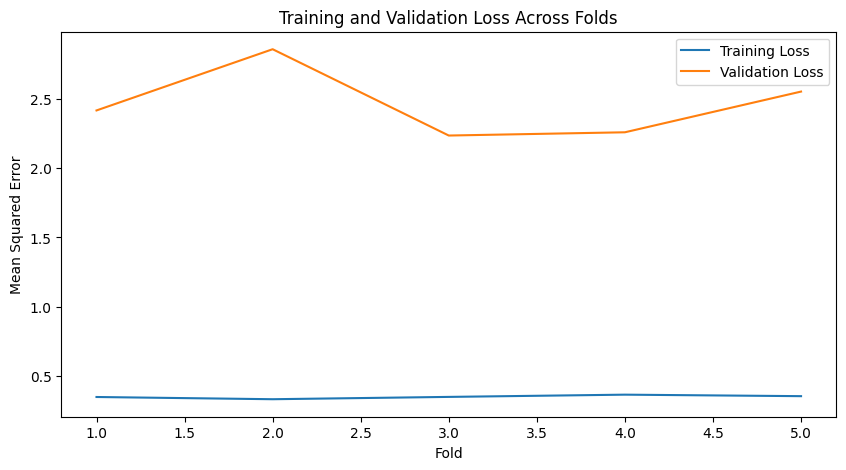

Average Training Loss: 0.350305161553838
Average Validation Loss: 2.464777294302544


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

# Fetch the historical stock data for Apple (AAPL)
ticker = 'AAPL'
start_date = '2010-01-01'
end_date = '2023-12-31'

data = yf.download(ticker, start=start_date, end=end_date)

# Use only the 'Close' prices for simplicity
data = data[['Close']]
print(data.head())

# Feature Engineering: Create sequences of 60 days of data to predict the next day's closing price
sequence_length = 60
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        labels.append(data[i + seq_length])
    return np.array(sequences), np.array(labels)

# Convert the data into sequences
raw_values = data.values
X, y = create_sequences(raw_values, sequence_length)

# Reshape the data to 2D for Random Forest input
X = X.reshape(X.shape[0], -1)

# Define KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store training and validation losses
training_losses = []
validation_losses = []

# Perform cross-validation
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Build and train the Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Calculate training loss
    y_train_pred = model.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    training_losses.append(train_mse)

    # Calculate validation loss
    y_val_pred = model.predict(X_val)
    val_mse = mean_squared_error(y_val, y_val_pred)
    validation_losses.append(val_mse)

# Plot training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(training_losses) + 1), training_losses, label='Training Loss')
plt.plot(range(1, len(validation_losses) + 1), validation_losses, label='Validation Loss')
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation Loss Across Folds')
plt.legend()
plt.show()

# Print the average training and validation losses
print(f'Average Training Loss: {np.mean(training_losses)}')
print(f'Average Validation Loss: {np.mean(validation_losses)}')


Explanation of Data Preprocessing Steps:
Data Loading:

The historical stock data for Apple (AAPL) is downloaded using the yfinance library.
Feature Selection:

Only the 'Close' prices are selected for simplicity.
Feature Engineering:

A function create_sequences is defined to create sequences of 60 days of data to predict the next day's closing price.
Data Conversion:

The data is converted into sequences using the create_sequences function. The sequences are then flattened from 3D to 2D to fit the Random Forest model.
Data Splitting:

The data is split into training and testing sets with an 80-20 split ratio.
Model Development and Evaluation:
Model Initialization and Training:

A Random Forest model is initialized and trained using the training data.
Predictions:

Predictions are made on both the training and testing sets.
Model Evaluation:

The model's performance is evaluated using Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).
Visualization:

The actual vs. predicted stock prices are plotted to visualize the model's performance.

[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training MAE: 0.19595290043501276, Training RMSE: 0.39172246054708015
Testing MAE: 22.074930005974927, Testing RMSE: 27.773342276213704


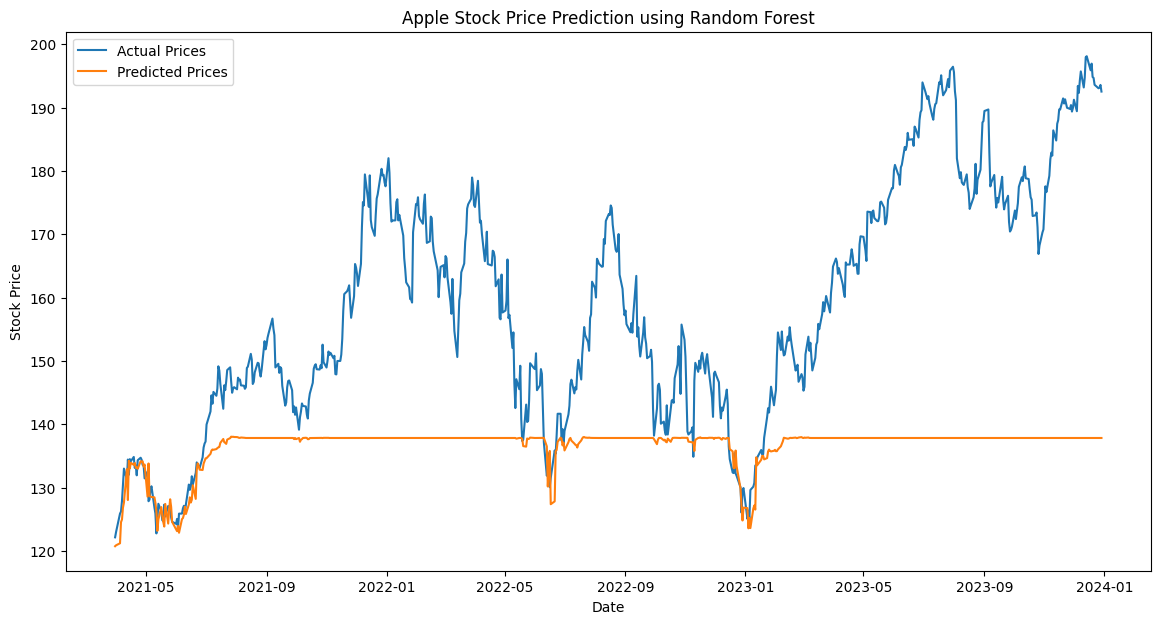

In [8]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Fetch the historical stock data for Apple (AAPL)
ticker = 'AAPL'
start_date = '2010-01-01'
end_date = '2023-12-31'

data = yf.download(ticker, start=start_date, end=end_date)

# Use only the 'Close' prices for simplicity
data = data[['Close']]

# Feature engineering: Create sequences of 60 days of data to predict the next day's closing price
def create_sequences(data, seq_length=60):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        labels.append(data[i + seq_length])
    return np.array(sequences), np.array(labels)

# Convert the data into sequences
sequence_length = 60
raw_values = data.values
X, y = create_sequences(raw_values, sequence_length)

# Flatten the 3D input into 2D for Random Forest
X = X.reshape((X.shape[0], X.shape[1]))

# Split the data into training and testing sets
split_ratio = 0.8
train_size = int(len(X) * split_ratio)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

# Evaluate the model
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f'Training MAE: {mae_train}, Training RMSE: {rmse_train}')
print(f'Testing MAE: {mae_test}, Testing RMSE: {rmse_test}')

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(data.index[train_size + sequence_length:], y_test, label='Actual Prices')
plt.plot(data.index[train_size + sequence_length:], y_pred_test, label='Predicted Prices')
plt.title('Apple Stock Price Prediction using Random Forest')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
